In [10]:
# 格力电器 000651
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_cdf_pdf(data, mini, maxi, step, norm=True):
    x = [float(i) for i in np.arange(mini, maxi, step)]
    cdf = [0] * len(x)
    pdf = [0] * len(x)
    count = 0
    for d in data:
        d = float(d)
        if d < mini or d > maxi:
            continue
        count += 1
        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i] += 1
            elif d >= x[i] and d < x[i+1]:
                pdf[i] += 1

            if d >= x[i]:
                cdf[i] += 1

    if norm:
        cdf = [c / count for c in cdf]
        pdf = [p / count for p in pdf]

    return x, cdf, pdf

数据加载完成 ...
0.0 1.0
10.0 0.6824949082304188
20.0 0.3908336374660058
30.0 0.2406674436765912
40.0 0.177426684404469
50.0 0.14249027756521193
60.0 0.12091373227691378
70.0 0.10610423705866424
80.0 0.09494119447616581
90.0 0.08621199813203674
100.0 0.07929190065260985
110.0 0.07361580391094995
120.0 0.06864686468646865
130.0 0.06425165703252846
140.0 0.06017039278244114
150.0 0.05704744077261472
160.0 0.05413875513591787
170.0 0.051587180121103665
180.0 0.049217692280524125
190.0 0.04706168595456454
200.0 0.04518273468250511
210.0 0.04324491902222327
220.0 0.04148526624362793
230.0 0.039990110782778636
240.0 0.03844943352837067
250.0 0.0367839637709312
260.0 0.03531784807493829
270.0 0.03391373620120633
280.0 0.031890370963374576
290.0 0.02958210208654635
300.0 0.028023373086416847
310.0 0.026443452906527276
320.0 0.024803098621396028
330.0 0.02379769487055721
340.0 0.022923362490826965
350.0 0.02218873492581125
360.0 0.021529453777720222
370.0 0.020804244514820092
380.0 0.0201590908199024

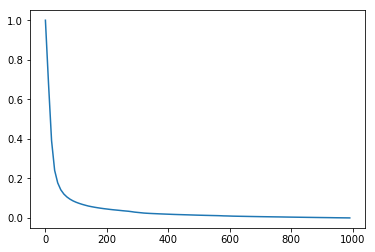

0 699523
count    1.294103e+06
mean     7.769239e+01
std      8.203872e+02
min      0.000000e+00
25%      8.000000e+00
50%      1.500000e+01
75%      3.000000e+01
max      6.995230e+05
dtype: float64


10       48427
9        47765
8        47582
6        47012
7        46803
4        45719
11       44402
5        44237
0        42403
12       42318
13       40118
2        39204
14       38696
15       36199
16       33289
17       31599
3        29486
18       29057
22       28594
19       27505
20       25791
21       23844
23       23052
24       19610
25       17301
26       15217
1        14327
27       13747
28       12597
29       11576
         ...  
5532         1
8393         1
2463         1
3023         1
4003         1
5945         1
3488         1
3272         1
4512         1
10990        1
8610         1
3025         1
5542         1
3493         1
2469         1
4931         1
10052        1
9639         1
2247         1
3905         1
2246         1
4046         1
3270         1
5024         1
10187        1
2249         1
2794         1
5322         1
2467         1
6072         1
Length: 4830, dtype: int64

In [47]:
# 格力电器 000651
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

in_dir = '/home/kayzhou/Project/Guba_analysis/data/tweet'


_list_len = []
for i, in_name in enumerate(os.listdir(in_dir)):
#     print(i)
    if i > 50:
        break
    in_name = os.path.join(in_dir, in_name)
    for j, line in enumerate(open(in_name)):
#         print(line)
        _list_len.append(len(json.loads(line)['content']))

# _lens = [int(line.strip()) for line in open('data/content_len.txt') if int(line.strip()) < 10e3]
# print('数据加载完成 ...')
# x, cdf, pdf = get_cdf_pdf(_lens, 0, 1000, 10)
# plt.plot(x, pdf)
# plt.yscale('log')
# plt.show()

# # 股吧文本内容长度分析
# _lens = pd.Series(_lens)
# print(_lens.min(), _lens.max())
# print(_lens.describe())
    
_lens = pd.Series(_list_len)
# _lens = [int(line.strip()) for line in open('data/content_len.txt') if int(line.strip()) < 10e3]
print('数据加载完成 ...')
x, cdf, pdf = get_cdf_pdf(_lens, 0, 1000, 10)
for k, v in zip(x, cdf):
    print(k, v)
plt.plot(x, cdf)
# plt.yscale('log')
plt.show()

# 股吧文本内容长度分析
print(_lens.min(), _lens.max())
print(_lens.describe())
_lens.value_counts()


In [26]:
# 网络分析

# 数据举例
'''
{
"user_id": "4580094433568274",
"name": "我想123321",
"guba_age": "2.8年",
"following_count": 1,
"follower_count": 1,
"post_count": 10,
"intro": "这个人很懒，什么都没有留下",
"stock_count": 0,
"is_majia": false,
"level": 0,
"depth": 1,
"download_timeout": 180.0,
"download_slot": "iguba.eastmoney.com",
"download_latency": 0.12041616439819336,
"following_list": ["5459113765361614"]
}
'''
# 载入数据，爬虫获取
data1 = pd.Series([len(json.loads(line.strip())['following_list']) for line in open('data/follow-2.txt')])
# 载入数据，完整网络
data2 = pd.Series([json.loads(line.strip())['following_count'] for line in open('data/follow-2.txt')])

count    788092.000000
mean          8.424326
std          12.112218
min           0.000000
25%           0.000000
50%           2.000000
75%          15.000000
max          50.000000
dtype: float64
0.0 1.0
1.0 0.6628134786293985
2.0 0.5470275044030393
3.0 0.48500809550154045
4.0 0.44390502631672446
5.0 0.41342635123818033
6.0 0.3874649152637002
7.0 0.3657263365190866
8.0 0.34827659714855624
9.0 0.33290783309562844
10.0 0.31799333072788455
11.0 0.30546179887627334
12.0 0.29477015373839605
13.0 0.27994574237525566
14.0 0.267247986275714
15.0 0.2558216553397319
16.0 0.24514650573790878
17.0 0.22733005791202043
18.0 0.21483151713251752
19.0 0.14414941402780387
20.0 0.13055836120655964
21.0 0.11822858244976475
22.0 0.10720068215386021
23.0 0.0964811214934297
24.0 0.0865228932662684
25.0 0.08194728534232044
26.0 0.07776122584672855
27.0 0.07405734355887383
28.0 0.0705450632667252
29.0 0.06743755805159804
30.0 0.06476781898560066
31.0 0.06114641437801678
32.0 0.0585337752445146
33.0 0.056318

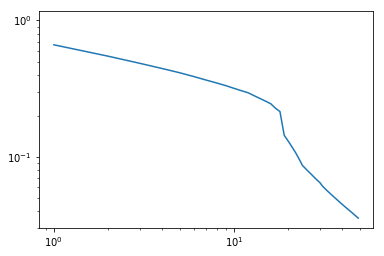

In [27]:
# 爬虫获取网络

print(data1.describe())
                 
x, cdf, pdf = get_cdf_pdf(data1, 0, 50, 1)
for k, v in zip(x, cdf):
    print(k, v)
plt.loglog()
plt.plot(x, cdf)
# plt.yscale('log')
plt.show()

count    788092.000000
mean         11.093081
std          32.442096
min           0.000000
25%           0.000000
50%           2.000000
75%          15.000000
max        1756.000000
dtype: float64
0.0 1.0
5.0 0.4133187130049851
10.0 0.31786522900104575
15.0 0.2556818758693511
20.0 0.13039632258130018
25.0 0.08177357781771294
30.0 0.06458834637994579
35.0 0.05225878996476907
40.0 0.04459834709065619
45.0 0.039058613302468195
50.0 0.03438696150995502
55.0 0.03052247367833247
60.0 0.027571756368472887
65.0 0.025156610114424376
70.0 0.02306762917161626
75.0 0.02137207720345608
80.0 0.019847857208126467
85.0 0.018548272466063578
90.0 0.017333719147553633
95.0 0.016220695887017352
100.0 0.015289157605108992
105.0 0.014365234077548658
110.0 0.013540302356512646
115.0 0.012865127470987786
120.0 0.012088422527489264
125.0 0.008726508482836343
130.0 0.007840658727016133
135.0 0.007258130019392241
140.0 0.006865970170468967
145.0 0.006503000213213122
150.0 0.006208563045089498
155.0 0.005930624

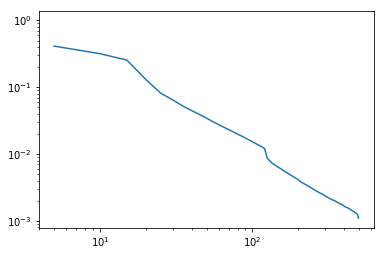

In [33]:
# 完整网络

# 实际关注数
print(data2.describe())

x, cdf, pdf = get_cdf_pdf(data2, 0, 500, 5)
for k, v in zip(x, cdf):
    print(k, v)
plt.loglog()
plt.plot(x, cdf)
# plt.yscale('log')
plt.show()